### Description of an experiment

**Goal**: Quantify the impact of the flanking sequences in createing TAD-boundary

**Input**: 100 weak and 100 CTCF motifs (defined by the threshold of genomic_SCD) are inserted into 3 different background sequences (those sequences were constructed in such a way that the model predicts maximally flat map - a map with no genomic structures, i.e. no TAD-boundaries)

**What changes in the experiment?** the length of flank that is inserted around CTCF motif (but the length of left flank is equal to the length of right flank)

**What is measured the experiment?** SCD and INS-16, INS-64, INS-256. Intuitively, the higher SCD / lower insulation score, the bigger boundary-creating potential

**Variants**: the CTCFs were inserted in four possible orientations: ">>", "<<", "<>", "><"


In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils

2022-10-03 15:12:11.622576: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /spack/apps/linux-centos7-x86_64/gcc-8.3.0/python-3.9.2-uvcroioc4witkp6qf7mbebof5ix4wlb6/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/pmix-3.1.3-3sm6emyqaxapunh7rwbjvtaqoqe2e5z3/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openmpi-4.0.2-ipm3dnvlbtxawpi4ifz7jma6jgr7mexq/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openblas-0.3.8-2no6mfziiclwxb7lstxoos335gnhjpes/lib:/spack/apps/gcc/8.3.0/lib64::/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2022-10-03 15:12:11.622607: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
folder = "/home1/smaruj/akita_utils/bin/insert_virtual_flanks_experiment/data/"

left_filename = "big_left.h5"               #orientation "<<"
right_filename = "big_right.h5"             #orientation ">>"
convergent_filename = "big_convergent.h5"   #orientation "><"
divergent_filename = "big_divergent.h5"     #orientation "<>"

scd_stats = ["SCD", "INS-16", "INS-64", "INS-256"]

In [4]:
left_df = akita_utils.h5_to_df(folder + left_filename, scd_stats, drop_duplicates_key=None)
right_df = akita_utils.h5_to_df(folder + right_filename, scd_stats, drop_duplicates_key=None)
convergent_df = akita_utils.h5_to_df(folder + convergent_filename, scd_stats, drop_duplicates_key=None)
divergent_df = akita_utils.h5_to_df(folder + divergent_filename, scd_stats, drop_duplicates_key=None)

In [7]:
# having an indicator 1{if a motif is strong}
is_strong = lambda x : True if (x > 20) else False

left_df["strong"] = left_df["genomic_SCD"].apply(is_strong)
right_df["strong"] = right_df["genomic_SCD"].apply(is_strong)
convergent_df["strong"] = convergent_df["genomic_SCD"].apply(is_strong)
divergent_df["strong"] = divergent_df["genomic_SCD"].apply(is_strong)

In [8]:
# averaging over all targets

#SCD
left_df["SCD_average"] = (left_df["SCD_h1_m1_t0"] + left_df["SCD_h1_m1_t1"] + left_df["SCD_h1_m1_t2"] + left_df["SCD_h1_m1_t3"] + left_df["SCD_h1_m1_t4"] + left_df["SCD_h1_m1_t5"]) / 6
right_df["SCD_average"] = (right_df["SCD_h1_m1_t0"] + right_df["SCD_h1_m1_t1"] + right_df["SCD_h1_m1_t2"] + right_df["SCD_h1_m1_t3"] + right_df["SCD_h1_m1_t4"] + right_df["SCD_h1_m1_t5"]) / 6
convergent_df["SCD_average"] = (convergent_df["SCD_h1_m1_t0"] + convergent_df["SCD_h1_m1_t1"] + convergent_df["SCD_h1_m1_t2"] + convergent_df["SCD_h1_m1_t3"] + convergent_df["SCD_h1_m1_t4"] + convergent_df["SCD_h1_m1_t5"]) / 6
divergent_df["SCD_average"] = (divergent_df["SCD_h1_m1_t0"] + divergent_df["SCD_h1_m1_t1"] + divergent_df["SCD_h1_m1_t2"] + divergent_df["SCD_h1_m1_t3"] + divergent_df["SCD_h1_m1_t4"] + divergent_df["SCD_h1_m1_t5"]) / 6

#INS-16
left_df["INS-16_average"] = (left_df["INS-16_h1_m1_t0"] + left_df["INS-16_h1_m1_t1"] + left_df["INS-16_h1_m1_t2"] + left_df["INS-16_h1_m1_t3"] + left_df["INS-16_h1_m1_t4"] + left_df["INS-16_h1_m1_t5"]) / 6
right_df["INS-16_average"] = (right_df["INS-16_h1_m1_t0"] + right_df["INS-16_h1_m1_t1"] + right_df["INS-16_h1_m1_t2"] + right_df["INS-16_h1_m1_t3"] + right_df["INS-16_h1_m1_t4"] + right_df["INS-16_h1_m1_t5"]) / 6
convergent_df["INS-16_average"] = (convergent_df["INS-16_h1_m1_t0"] + convergent_df["INS-16_h1_m1_t1"] + convergent_df["INS-16_h1_m1_t2"] + convergent_df["INS-16_h1_m1_t3"] + convergent_df["INS-16_h1_m1_t4"] + convergent_df["INS-16_h1_m1_t5"]) / 6
divergent_df["INS-16_average"] = (divergent_df["INS-16_h1_m1_t0"] + divergent_df["INS-16_h1_m1_t1"] + divergent_df["INS-16_h1_m1_t2"] + divergent_df["INS-16_h1_m1_t3"] + divergent_df["INS-16_h1_m1_t4"] + divergent_df["INS-16_h1_m1_t5"]) / 6

#INS-64
left_df["INS-64_average"] = (left_df["INS-64_h1_m1_t0"] + left_df["INS-64_h1_m1_t1"] + left_df["INS-64_h1_m1_t2"] + left_df["INS-64_h1_m1_t3"] + left_df["INS-64_h1_m1_t4"] + left_df["INS-64_h1_m1_t5"]) / 6
right_df["INS-64_average"] = (right_df["INS-64_h1_m1_t0"] + right_df["INS-64_h1_m1_t1"] + right_df["INS-64_h1_m1_t2"] + right_df["INS-64_h1_m1_t3"] + right_df["INS-64_h1_m1_t4"] + right_df["INS-64_h1_m1_t5"]) / 6
convergent_df["INS-64_average"] = (convergent_df["INS-64_h1_m1_t0"] + convergent_df["INS-64_h1_m1_t1"] + convergent_df["INS-64_h1_m1_t2"] + convergent_df["INS-64_h1_m1_t3"] + convergent_df["INS-64_h1_m1_t4"] + convergent_df["INS-64_h1_m1_t5"]) / 6
divergent_df["INS-64_average"] = (divergent_df["INS-64_h1_m1_t0"] + divergent_df["INS-64_h1_m1_t1"] + divergent_df["INS-64_h1_m1_t2"] + divergent_df["INS-64_h1_m1_t3"] + divergent_df["INS-64_h1_m1_t4"] + divergent_df["INS-64_h1_m1_t5"]) / 6

#INS-256
left_df["INS-256_average"] = (left_df["INS-256_h1_m1_t0"] + left_df["INS-256_h1_m1_t1"] + left_df["INS-256_h1_m1_t2"] + left_df["INS-256_h1_m1_t3"] + left_df["INS-256_h1_m1_t4"] + left_df["INS-256_h1_m1_t5"]) / 6
right_df["INS-256_average"] = (right_df["INS-256_h1_m1_t0"] + right_df["INS-256_h1_m1_t1"] + right_df["INS-256_h1_m1_t2"] + right_df["INS-256_h1_m1_t3"] + right_df["INS-256_h1_m1_t4"] + right_df["INS-256_h1_m1_t5"]) / 6
convergent_df["INS-256_average"] = (convergent_df["INS-256_h1_m1_t0"] + convergent_df["INS-256_h1_m1_t1"] + convergent_df["INS-256_h1_m1_t2"] + convergent_df["INS-256_h1_m1_t3"] + convergent_df["INS-256_h1_m1_t4"] + convergent_df["INS-256_h1_m1_t5"]) / 6
divergent_df["INS-256_average"] = (divergent_df["INS-256_h1_m1_t0"] + divergent_df["INS-256_h1_m1_t1"] + divergent_df["INS-256_h1_m1_t2"] + divergent_df["INS-256_h1_m1_t3"] + divergent_df["INS-256_h1_m1_t4"] + divergent_df["INS-256_h1_m1_t5"]) / 6


In [9]:
# left_df

,INS-16_h1_m1_t0,INS-16_h1_m1_t1,INS-16_h1_m1_t2,INS-16_h1_m1_t3,INS-16_h1_m1_t4,INS-16_h1_m1_t5,INS-256_h1_m1_t0,INS-256_h1_m1_t1,INS-256_h1_m1_t2,INS-256_h1_m1_t3,...,genomic_SCD,orientation,spacer_bp,start,strand,strong,SCD_average,INS-16_average,INS-64_average,INS-256_average
0,-0.060303,-0.025421,-0.103516,-0.114380,-0.089722,-0.096069,-0.051117,-0.048553,-0.153931,-0.160400,...,53.70000,<<,90,48886252,-,True,38.59375,-0.081604,-0.106140,-0.111267
1,-0.095947,-0.090149,-0.160767,-0.156982,-0.144775,-0.130493,-0.075684,-0.083801,-0.161621,-0.163208,...,53.66000,<<,90,35192359,-,True,41.03125,-0.129761,-0.149048,-0.127563
2,-0.087769,-0.077026,-0.150024,-0.148804,-0.133911,-0.123718,-0.072083,-0.078308,-0.160156,-0.162598,...,53.50000,<<,90,102781112,-,True,40.56250,-0.120178,-0.140503,-0.125122
3,-0.087036,-0.079712,-0.148926,-0.147339,-0.133911,-0.122437,-0.074036,-0.082764,-0.161621,-0.163330,...,53.30000,<<,90,49961991,-,True,40.68750,-0.119873,-0.146484,-0.127075
4,-0.064331,-0.033234,-0.112427,-0.121399,-0.097351,-0.101624,-0.057190,-0.056458,-0.155396,-0.160889,...,53.12000,<<,90,26776356,-,True,39.03125,-0.088379,-0.113586,-0.114929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18595,-0.119873,-0.052124,-0.130737,-0.151001,-0.121826,-0.131348,-0.061066,-0.022003,-0.150269,-0.158691,...,0.08300,<<,60,75177322,+,False,38.96875,-0.117737,-0.098938,-0.105896
18596,-0.120239,-0.052612,-0.131592,-0.151855,-0.122620,-0.131958,-0.060974,-0.021942,-0.150391,-0.158813,...,0.08320,<<,60,11963750,+,False,39.00000,-0.118469,-0.099121,-0.105896
18597,-0.120300,-0.053223,-0.132080,-0.152100,-0.123108,-0.132446,-0.061096,-0.022186,-0.150391,-0.158691,...,0.08340,<<,60,82914080,+,False,38.96875,-0.118896,-0.099365,-0.105957
18598,-0.120850,-0.056091,-0.135132,-0.154663,-0.126099,-0.134888,-0.060333,-0.021805,-0.150024,-0.158203,...,0.08340,<<,60,64314120,+,False,39.00000,-0.121277,-0.099670,-0.105469


In [10]:
left_df.columns

Index(['INS-16_h1_m1_t0', 'INS-16_h1_m1_t1', 'INS-16_h1_m1_t2',
       'INS-16_h1_m1_t3', 'INS-16_h1_m1_t4', 'INS-16_h1_m1_t5',
       'INS-256_h1_m1_t0', 'INS-256_h1_m1_t1', 'INS-256_h1_m1_t2',
       'INS-256_h1_m1_t3', 'INS-256_h1_m1_t4', 'INS-256_h1_m1_t5',
       'INS-64_h1_m1_t0', 'INS-64_h1_m1_t1', 'INS-64_h1_m1_t2',
       'INS-64_h1_m1_t3', 'INS-64_h1_m1_t4', 'INS-64_h1_m1_t5', 'SCD_h1_m1_t0',
       'SCD_h1_m1_t1', 'SCD_h1_m1_t2', 'SCD_h1_m1_t3', 'SCD_h1_m1_t4',
       'SCD_h1_m1_t5', 'background_index', 'chrom', 'end', 'experiment_id',
       'flank_bp', 'genomic_SCD', 'orientation', 'spacer_bp', 'start',
       'strand', 'strong', 'SCD_average', 'INS-16_average', 'INS-64_average',
       'INS-256_average'],
      dtype='object')

### SCD

In [36]:
#differences between orientations and backgrounds in averaged SCD

right_strong = right_df[(right_df.strong == True)].groupby("background_index")["SCD_average"].mean()
left_strong = left_df[(left_df.strong == True)].groupby("background_index")["SCD_average"].mean()
convergent_strong = convergent_df[(convergent_df.strong == True)].groupby("background_index")["SCD_average"].mean()
divergent_strong = divergent_df[(divergent_df.strong == True)].groupby("background_index")["SCD_average"].mean()

print("STRONG MOTIFS")
strong_backgrounds_ave = pd.concat([right_strong, left_strong, convergent_strong, divergent_strong], axis=1)
strong_backgrounds_ave.columns = [">>", "<<", "><", "<>"]
strong_backgrounds_ave

STRONG MOTIFS


,>>,<<,><,<>
background_index,,,,
0,53.46875,61.78125,57.46875,56.84375
1,57.62500,55.03125,54.25000,54.96875
2,48.62500,51.40625,48.37500,49.93750


In [37]:
right_weak = right_df[(right_df.strong == False)].groupby("background_index")["SCD_average"].mean()
left_weak = left_df[(left_df.strong == False)].groupby("background_index")["SCD_average"].mean()
convergent_weak = convergent_df[(convergent_df.strong == False)].groupby("background_index")["SCD_average"].mean()
divergent_weak = divergent_df[(divergent_df.strong == False)].groupby("background_index")["SCD_average"].mean()

print("STRONG MOTIFS")
weak_backgrounds_ave = pd.concat([right_weak, left_weak, convergent_weak, divergent_weak], axis=1)
weak_backgrounds_ave.columns = [">>", "<<", "><", "<>"]
weak_backgrounds_ave

STRONG MOTIFS


,>>,<<,><,<>
background_index,,,,
0,37.96875,37.9375,37.9375,37.96875
1,39.00000,39.0000,39.0000,39.00000
2,39.00000,39.0000,39.0000,39.00000


### Comment:
The values of the averaged SCD scores are relatively consistent between backgrounds.

In [38]:
import matplotlib.pyplot as plt

In [40]:
SCD_flanks = {"right_strong" : [],
              "right_weak" : [],
              "left_strong" : [],
              "left_weak" : [],
              "convergent_strong" : [],
              "convergent_weak" : [],
              "divergent_strong" : [],
              "divergent_weak" : []}

for l in range(30):
    SCD_flanks["right_strong"].append(right_df[(right_df.strong == True) & (right_df.flank_bp == l)]["SCD_average"].mean())
    SCD_flanks["right_weak"].append(right_df[(right_df.strong == False) & (right_df.flank_bp == l)]["SCD_average"].mean())
    
    SCD_flanks["left_strong"].append(left_df[(left_df.strong == True) & (left_df.flank_bp == l)]["SCD_average"].mean())
    SCD_flanks["left_weak"].append(left_df[(left_df.strong == False) & (left_df.flank_bp == l)]["SCD_average"].mean())
    
    SCD_flanks["convergent_strong"].append(convergent_df[(convergent_df.strong == True) & (convergent_df.flank_bp == l)]["SCD_average"].mean())
    SCD_flanks["convergent_weak"].append(convergent_df[(convergent_df.strong == False) & (convergent_df.flank_bp == l)]["SCD_average"].mean())
    
    SCD_flanks["divergent_strong"].append(divergent_df[(divergent_df.strong == True) & (divergent_df.flank_bp == l)]["SCD_average"].mean())
    SCD_flanks["divergent_weak"].append(divergent_df[(divergent_df.strong == False) & (divergent_df.flank_bp == l)]["SCD_average"].mean())

In [52]:
# >> : red - blue
# << : pink - green
# >< : orange - violet
# <> : dark orange / brown  - turquise 

colors_2 = {"right" : ["#e43201", "#2166ac"], 
            "left" : ["#d01c8b", "#4dac26"],
            "convergent" : ["#a819dd", "#fc7a02"],
            "divergent" : ["#614616", "#028a75"]}

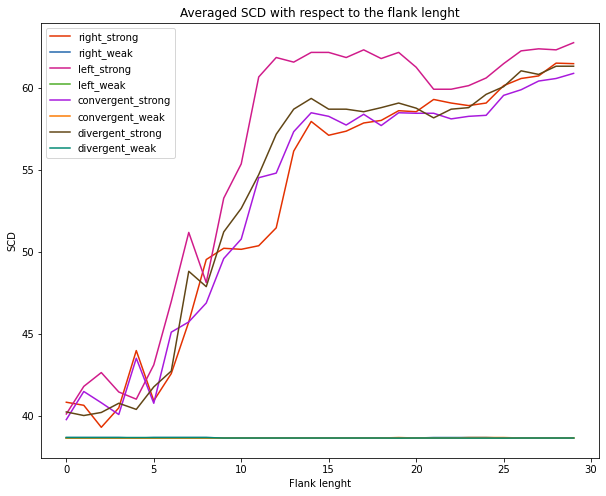

In [53]:
plt.figure(figsize=(10,8))
x = [x for x in range(30)]

plt.plot(x, SCD_flanks["right_strong"], label="right_strong", c=colors_2["right"][0])
plt.plot(x, SCD_flanks["right_weak"], label="right_weak", c=colors_2["right"][1])

plt.plot(x, SCD_flanks["left_strong"], label="left_strong", c=colors_2["left"][0])
plt.plot(x, SCD_flanks["left_weak"], label="left_weak", c=colors_2["left"][1])

plt.plot(x, SCD_flanks["convergent_strong"], label="convergent_strong", c=colors_2["convergent"][0])
plt.plot(x, SCD_flanks["convergent_weak"], label="convergent_weak", c=colors_2["convergent"][1])

plt.plot(x, SCD_flanks["divergent_strong"], label="divergent_strong", c=colors_2["divergent"][0])
plt.plot(x, SCD_flanks["divergent_weak"], label="divergent_weak", c=colors_2["divergent"][1])

plt.title("Averaged SCD with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
plt.legend(loc="upper left")

### Comment:
Interesting peak around flank =3,4 bp for >> and ><.

In [ ]:
strong_colors_10 = ["#3B0FE8", "#5736DC", "#441CE5", "#3411C1", "#7A5DEC", "#6648DF", "#3919B7", "#3108D4", "#1F0EB5", "#4E41BD"]
weak_colors_10 = ["#E80F49", "#E92459", "#D01B4B", "#C61342", "#C94366", "#DB2555", "#E40842", "#CE0E41", "#E94772", "#F07293"]

In [58]:
SCD_backgrounds = {"right_strong" : [[] for i in range(3)],
              "right_weak" : [[] for i in range(3)],
              "left_strong" : [[] for i in range(3)],
              "left_weak" : [[] for i in range(3)],
              "convergent_strong" : [[] for i in range(3)],
              "convergent_weak" : [[] for i in range(3)],
              "divergent_strong" : [[] for i in range(3)],
              "divergent_weak" : [[] for i in range(3)]}

for l in range(30):
    for b in range(3):
        
        SCD_backgrounds["right_strong"][b].append(right_df[(right_df.strong == True) & (right_df.flank_bp == l) & (right_df.background_index == b)]["SCD_average"].mean())
        SCD_backgrounds["right_weak"][b].append(right_df[(right_df.strong == False) & (right_df.flank_bp == l) & (right_df.background_index == b)]["SCD_average"].mean())

        SCD_backgrounds["left_strong"][b].append(left_df[(left_df.strong == True) & (left_df.flank_bp == l) & (left_df.background_index == b)]["SCD_average"].mean())
        SCD_backgrounds["left_weak"][b].append(left_df[(left_df.strong == False) & (left_df.flank_bp == l) & (left_df.background_index == b)]["SCD_average"].mean())

        SCD_backgrounds["convergent_strong"][b].append(convergent_df[(convergent_df.strong == True) & (convergent_df.flank_bp == l) & (convergent_df.background_index == b)]["SCD_average"].mean())
        SCD_backgrounds["convergent_weak"][b].append(convergent_df[(convergent_df.strong == False) & (convergent_df.flank_bp == l) & (convergent_df.background_index == b)]["SCD_average"].mean())

        SCD_backgrounds["divergent_strong"][b].append(divergent_df[(divergent_df.strong == True) & (divergent_df.flank_bp == l) & (divergent_df.background_index == b)]["SCD_average"].mean())
        SCD_backgrounds["divergent_weak"][b].append(divergent_df[(divergent_df.strong == False) & (divergent_df.flank_bp == l) & (divergent_df.background_index == b)]["SCD_average"].mean())


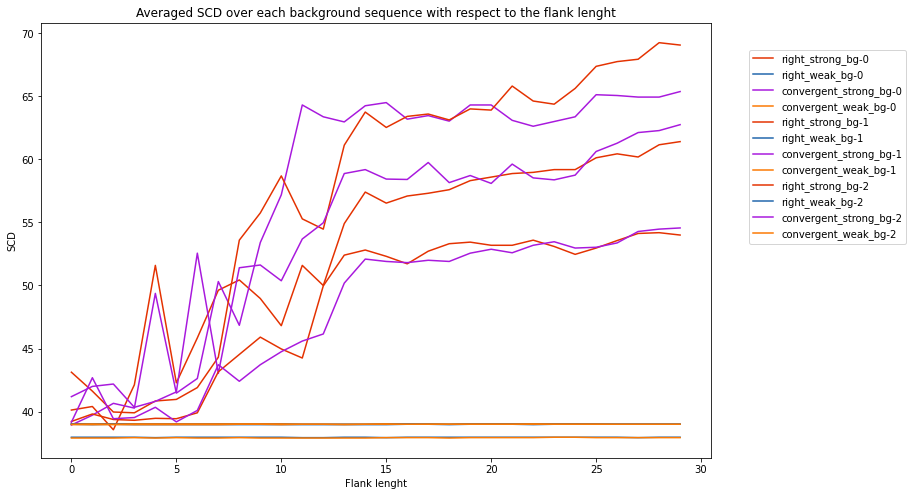

In [72]:
plt.figure(figsize=(12,8))
x = [x for x in range(30)]

for b in range(3):
    plt.plot(x, SCD_backgrounds["right_strong"][b], label=f"right_strong_bg-{b}", c=colors_2["right"][0])
    plt.plot(x, SCD_backgrounds["right_weak"][b], label=f"right_weak_bg-{b}", c=colors_2["right"][1])

    # plt.plot(x, SCD_backgrounds["left_strong"][b], label=f"left_strong_bg-{b}", c=colors_2["left"][0])
    # plt.plot(x, SCD_backgrounds["left_weak"][b], label=f"left_weak_bg-{b}", c=colors_2["left"][1])

    plt.plot(x, SCD_backgrounds["convergent_strong"][b], label=f"convergent_strong_bg-{b}", c=colors_2["convergent"][0])
    plt.plot(x, SCD_backgrounds["convergent_weak"][b], label=f"convergent_weak_bg-{b}", c=colors_2["convergent"][1])

    # plt.plot(x, SCD_backgrounds["divergent_strong"][b], label=f"divergent_strong_bg-{b}", c=colors_2["divergent"][0])
    # plt.plot(x, SCD_backgrounds["divergent_weak"][b], label=f"divergent_weak_bg-{b}", c=colors_2["divergent"][1])

plt.legend(loc="upper right")
plt.title("Averaged SCD over each background sequence with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.3, 0.95), loc='upper right', ncol=1)

### Comment: 
Tendecies are consistent among background sequences and orientations. There are some peaks that overlap - is it caused by inserting into the same bakchround sequence?

In [ ]:
SCD_strong_fl_target = [[] for i in range(6)]
SCD_weak_fl_target = [[] for i in range(6)]

for l in range(30):
    for t in range(6):
        SCD_strong_fl_target[t].append(df[(df.strong == True) & (df.flank_bp == l)][f"SCD_h1_m1_t{t}"].mean())
        SCD_weak_fl_target[t].append(df[(df.strong == False) & (df.flank_bp == l)][f"SCD_h1_m1_t{t}"].mean())

In [ ]:
strong_targets = ["#F20808", "#1119EF", "#09DAE9", "#13F238", "#EC9018", "#E80ACA"]
weak_targets = ["#E65A5A", "#7B7EDB", "#AAEAEF", "#98F0A7", "#EEBE80", "#E69FDD"]

# A color of one target is same, but darker for strong, and paler for weak motifs.

In [ ]:
plt.figure(figsize=(12,8))
x = [x for x in range(30)]

for t in range(6):
    plt.plot(x, SCD_strong_fl_target[t], label=f"strong_target-{t}", c=strong_targets[t])
    plt.plot(x, SCD_weak_fl_target[t], label=f"weak_target-{t}", c=weak_targets[t])

plt.legend(loc="upper right")
plt.title("Averaged SCD over each target with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

### Comment:
Tendecies are consistent between targets!

In [ ]:
get_seq_index = lambda x : (x % 20)
df["seq_index"] = df["experiment_id"].apply(get_seq_index)

In [ ]:
# 20 sequences = 10 first are strong, 10 next are weak

SCD_strong_fl_seqs = [[] for i in range(10)]
SCD_weak_fl_seqs = [[] for i in range(10)]

for l in range(30):
    for s in range(20):
        if s <= 9:
            SCD_strong_fl_seqs[s].append(df[(df.strong == True) & (df.flank_bp == l) & (df.seq_index == s)]["SCD_average"].mean())
        else:
            ind = s % 10
            SCD_weak_fl_seqs[ind].append(df[(df.strong == False) & (df.flank_bp == l) & (df.seq_index == s)][f"SCD_average"].mean())


In [ ]:
plt.figure(figsize=(12,8))

x = [x for x in range(30)]

for s in range(10):
    plt.plot(x, SCD_strong_fl_seqs[s], label=f"strong_seq-{s}", c=strong_colors_10[s])
    plt.plot(x, SCD_weak_fl_seqs[s], label=f"weak_seq-{s}", c=weak_colors_10[s])
    
plt.legend(loc="upper right")
plt.title("Averaged SCD over each strong / weak sequence with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
# plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

### INS-16

In [ ]:
INS16_strong_fl = []
INS16_weak_fl = []

for l in range(30):
    INS16_strong_fl.append(df[(df.strong == True) & (df.flank_bp == l)]["INS-16_average"].mean())
    INS16_weak_fl.append(df[(df.strong == False) & (df.flank_bp == l)]["INS-16_average"].mean())

In [ ]:
plt.figure(figsize=(10,8))
x = [x for x in range(30)]
plt.plot(x, INS16_strong_fl, label="strong", c=colors_2[0])
plt.plot(x, INS16_weak_fl, label="weak", c=colors_2[1])
plt.title("Averaged INS-16 with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("INS-16")
plt.legend(loc="upper right")

In [ ]:
INS16_strong_fl_bg = [[] for i in range(10)]
INS16_weak_fl_bg = [[] for i in range(10)]

for l in range(30):
    for b in range(10):
        INS16_strong_fl_bg[b].append(df[(df.strong == True) & (df.flank_bp == l) & (df.background_index == b)]["INS-16_average"].mean())
        INS16_weak_fl_bg[b].append(df[(df.strong == False) & (df.flank_bp == l) & (df.background_index == b)]["INS-16_average"].mean())

In [ ]:
plt.figure(figsize=(12,8))
x = [x for x in range(30)]
for b in range(10):
    plt.plot(x, INS16_strong_fl_bg[b], label=f"strong_bg-{b}", c=strong_colors_10[b])
    plt.plot(x, INS16_weak_fl_bg[b], label=f"weak_bg-{b}", c=weak_colors_10[b])
plt.legend(loc="upper right")
plt.title("Averaged INS-16 over each background sequence with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("INS-16")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

### Comment:
Insulation drops for strong sequences inserted with 15-20bp flanks and doesn't change with flank lenght when a motif is weak.

In [ ]:
df.columns

In [ ]:
INS16_strong_fl_target = [[] for i in range(6)]
INS16_weak_fl_target = [[] for i in range(6)]

for l in range(30):
    for t in range(6):
        INS16_strong_fl_target[t].append(df[(df.strong == True) & (df.flank_bp == l)][f"INS-16_h1_m1_t{t}"].mean())
        INS16_weak_fl_target[t].append(df[(df.strong == False) & (df.flank_bp == l)][f"INS-16_h1_m1_t{t}"].mean())

In [ ]:
plt.figure(figsize=(12,8))
x = [x for x in range(30)]

for t in range(6):
    plt.plot(x, INS16_strong_fl_target[t], label=f"strong_target-{t}", c=strong_targets[t])
    plt.plot(x, INS16_weak_fl_target[t], label=f"weak_target-{t}", c=weak_targets[t])

plt.legend(loc="upper right")
plt.title("Averaged INS-16 over each target with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("INS-16")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

### Comment:
Again, strong consistency between targets.

In [ ]:
INS16_strong_fl_seqs = [[] for i in range(10)]
INS16_weak_fl_seqs = [[] for i in range(10)]

for l in range(30):
    for s in range(20):
        if s <= 9:
            INS16_strong_fl_seqs[s].append(df[(df.strong == True) & (df.flank_bp == l) & (df.seq_index == s)]["INS-16_average"].mean())
        else:
            ind = s % 10
            INS16_weak_fl_seqs[ind].append(df[(df.strong == False) & (df.flank_bp == l) & (df.seq_index == s)][f"INS-16_average"].mean())

In [ ]:
plt.figure(figsize=(12,8))

x = [x for x in range(30)]

for s in range(10):
    plt.plot(x, INS16_strong_fl_seqs[s], label=f"strong_seq-{s}", c=strong_colors_10[s])
    plt.plot(x, INS16_weak_fl_seqs[s], label=f"weak_seq-{s}", c=weak_colors_10[s])
    
plt.legend(loc="upper right")
plt.title("Averaged INS-16 over each strong / weak sequence with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("INS-16")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

### Comment:
15bp flanks around seems to play a major role in the change of insulation score.